# Figure 3B Inputs to the oviINr Region Breakdwon based on known versus generic celltypes
Written by Rhessa Weber Langstaff \
\
We used the nomenclature presented in Scheffer et al., "A connectome and analysis of the adult Drosophila central brain"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuprint import Client
import matplotlib.patheffects as path_effects
import matplotlib as mpl
import bokeh
import bokeh.palettes

from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC

# Turn off warning messages
import warnings
warnings.filterwarnings('ignore')

auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
except:
    np_client = None

# Body Ids of oviINs
oviINr= 423101189
oviINl= 485934965
# inputs to the oviINr
ovi_inputs = fetch_simple_connections(None, oviINr)

# import modularity data
mod = pd.read_csv('oviIN_sep10/preprocessed_inputs-v1.2.1/preprocessed_nodes.csv')
mod

,id,key,0.05,0.1,0.5,0.0,instance,celltype,pre,post,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G..."
1,263674097,2,2,2,2,2,LHPD2a5_a_R,LHPD2a5_a,133,547,...,Traced,False,Roughly traced,PDL06,268.5,"[5386, 20096, 4080]","{'SNP(R)': {'pre': 121, 'post': 330, 'downstre...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LH(R)'...","['INP', 'LH(R)', 'SCL(R)', 'SIP(R)', 'SMP(R)',..."
2,266187480,3,3,3,3,3,SMP349_R,SMP349,190,854,...,Traced,False,Traced,PDM07,238.5,"[18808, 27714, 4256]","{'SNP(R)': {'pre': 190, 'post': 854, 'downstre...",NaN,"['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']"
3,266187559,4,3,3,4,3,SLP399_R,SLP399,216,749,...,Traced,False,Roughly traced,PDM07,290.5,"[17838, 26568, 3924]","{'SNP(R)': {'pre': 216, 'post': 744, 'downstre...",NaN,"['LH(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SLP(R)', 'SMP(R)', 'SNP(R)']"
4,267214250,5,3,3,5,3,pC1b_R,pC1b,816,3187,...,Traced,False,Traced,PDM09,446.5,"[18931, 10896, 14728]","{'SNP(R)': {'pre': 547, 'post': 2474, 'downstr...",NaN,"['AOTU(R)', 'AVLP(R)', 'ICL(R)', 'INP', 'SCL(R...","['AVLP(R)', 'INP', 'SCL(R)', 'SIP(R)', 'SLP(R)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,5901231318,2507,6,6,235,5,NaN,NaN,55,66,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 55, 'post': 66, 'downstream...",NaN,"['SMP(L)', 'SNP(L)']","['SMP(L)', 'SNP(L)']"
2507,5901232053,2508,4,4,15,4,SMP272(PDL21)_L,SMP272,1064,1640,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(L)': {'pre': 464, 'post': 967, 'downstre...",NaN,"['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'LAL(L)', 'L...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SCL(L)', 'S..."
2508,6400000773,2509,3,3,31,3,SMP411_R,SMP411,182,522,...,Traced,False,Roughly traced,PDM09,321.5,"[22433, 11755, 18464]","{'SNP(R)': {'pre': 180, 'post': 467, 'downstre...",NaN,"['INP', 'LH(R)', 'MB(+ACA)(R)', 'PLP(R)', 'SCL...","['MB(+ACA)(R)', 'PLP(R)', 'SIP(R)', 'SLP(R)', ..."
2509,7112622044,2510,7,7,77,6,LAL137(PVL05)_L,LAL137,1376,2087,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",VeLC-(LC)(c)Sm(b),"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'..."


In [4]:
# Import roi data
roi_df = pd.read_excel('all_roi_df.xlsx')
roi_super = roi_df['Super'].dropna()
roi_supersplit = roi_df['Super_split'].dropna()
roi_df

,Super,Super_split,L1,L2,L3,L4,Color,Color2
0,AL,AL(L),AL(L),NaN,NaN,NaN,cadetblue,NaN
1,AL,NaN,NaN,AL-D(L),NaN,NaN,NaN,cadetblue
2,AL,NaN,NaN,AL-DA2(L),NaN,NaN,NaN,cadetblue
3,AL,NaN,NaN,AL-DA3(L),NaN,NaN,NaN,cadetblue
4,AL,NaN,NaN,AL-DA4m(L),NaN,NaN,NaN,cadetblue
...,...,...,...,...,...,...,...,...
225,VMNP,NaN,NaN,VES(L),NaN,NaN,NaN,firebrick
226,VMNP,NaN,NaN,VES(R),NaN,NaN,NaN,firebrick
227,AL,AL(L),mALT(L),mALT(L),NaN,NaN,cadetblue,NaN
228,AL,AL(R),mALT(R),mALT(R),NaN,NaN,cadetblue,NaN


In [5]:
# reads all bodyIds in connectome (fetch_synaptic_connections)
ids = mod['id']
roi_info = fetch_synapse_connections(NC(bodyId=ids), NC(bodyId=423101189), batch_size=1000)
roi_info

  0%|          | 0/21608 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

,bodyId_pre,bodyId_post,roi_pre,roi_post,x_pre,y_pre,z_pre,x_post,y_post,z_post,confidence_pre,confidence_post
0,699363923,423101189,SMP(R),SMP(R),18710,34066,11978,18714,34056,11998,0.836,0.462087
1,699363923,423101189,SMP(R),SMP(R),22445,25222,10972,22414,25228,10973,0.994,0.456265
2,699363923,423101189,SMP(R),SMP(R),22609,32249,11168,22598,32226,11165,0.996,0.895489
3,699358695,423101189,SMP(R),SMP(R),23605,19671,12076,23607,19654,12075,0.811,0.844000
4,699358695,423101189,SMP(R),SMP(R),21837,24629,12812,21852,24648,12828,0.941,0.844886
...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1875284107,423101189,VES(R),VES(R),22272,23848,29541,22261,23861,29557,0.933,0.854542
21604,1844249219,423101189,IB,IB,25286,16199,21709,25311,16190,21743,0.752,0.604000
21605,1844249219,423101189,VES(R),VES(R),22038,21037,28943,22057,21047,28964,0.937,0.425953
21606,1848000962,423101189,VES(R),VES(R),23349,21550,26101,23335,21569,26106,0.817,0.993132


In [6]:
# Drop all unnecessary columns
roi_info_small = roi_info[['bodyId_pre', 'roi_pre', 'bodyId_post', 'roi_post']]
# Collapse on roi_post and count the number of synapses in a new column called weight
roi_info_grouped = roi_info_small.groupby(['roi_post', 'bodyId_pre']).size().reset_index(name='weight')

# rename roi_post to roi
roi_info_grouped = roi_info_grouped.rename(columns = {'roi_post':'roi', 'bodyId_pre':'bodyId'})

# mergo onto modularity data
inputs_roi = pd.merge(mod, roi_info_grouped, left_on='id', right_on='bodyId', how='inner')
inputs_roi

,id,key,0.05,0.1,0.5,0.0,instance,celltype,pre,post,...,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois,roi,bodyId,weight
0,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",CRE(R),234630133,2
1,263674097,2,2,2,2,2,LHPD2a5_a_R,LHPD2a5_a,133,547,...,PDL06,268.5,"[5386, 20096, 4080]","{'SNP(R)': {'pre': 121, 'post': 330, 'downstre...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LH(R)'...","['INP', 'LH(R)', 'SCL(R)', 'SIP(R)', 'SMP(R)',...",SMP(R),263674097,2
2,266187480,3,3,3,3,3,SMP349_R,SMP349,190,854,...,PDM07,238.5,"[18808, 27714, 4256]","{'SNP(R)': {'pre': 190, 'post': 854, 'downstre...",NaN,"['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']",SMP(R),266187480,1
3,266187559,4,3,3,4,3,SLP399_R,SLP399,216,749,...,PDM07,290.5,"[17838, 26568, 3924]","{'SNP(R)': {'pre': 216, 'post': 744, 'downstre...",NaN,"['LH(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SLP(R)', 'SMP(R)', 'SNP(R)']",SMP(R),266187559,3
4,267214250,5,3,3,5,3,pC1b_R,pC1b,816,3187,...,PDM09,446.5,"[18931, 10896, 14728]","{'SNP(R)': {'pre': 547, 'post': 2474, 'downstr...",NaN,"['AOTU(R)', 'AVLP(R)', 'ICL(R)', 'INP', 'SCL(R...","['AVLP(R)', 'INP', 'SCL(R)', 'SIP(R)', 'SLP(R)...",SMP(R),267214250,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,6400000773,2509,3,3,31,3,SMP411_R,SMP411,182,522,...,PDM09,321.5,"[22433, 11755, 18464]","{'SNP(R)': {'pre': 180, 'post': 467, 'downstre...",NaN,"['INP', 'LH(R)', 'MB(+ACA)(R)', 'PLP(R)', 'SCL...","['MB(+ACA)(R)', 'PLP(R)', 'SIP(R)', 'SLP(R)', ...",SMP(R),6400000773,2
3497,7112622044,2510,7,7,77,6,LAL137(PVL05)_L,LAL137,1376,2087,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",VeLC-(LC)(c)Sm(b),"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",SIP(R),7112622044,1
3498,7112622044,2510,7,7,77,6,LAL137(PVL05)_L,LAL137,1376,2087,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",VeLC-(LC)(c)Sm(b),"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",SMP(L),7112622044,1
3499,7112622044,2510,7,7,77,6,LAL137(PVL05)_L,LAL137,1376,2087,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",VeLC-(LC)(c)Sm(b),"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",SMP(R),7112622044,1


In [7]:
# Filter dataframe to only include the columns needed
inputs_roi_filtered = inputs_roi[['roi','celltype', 'weight']]

# Check for 'None' celltype
#inputs_roi_filtered[inputs_roi_filtered['celltype']=='None']

# Drop the 'None' celltype
inputs_roi_filtered = inputs_roi_filtered[inputs_roi_filtered['celltype']!='None']

inputs_roi_filtered

# group by roi so that the celltypes are in each roi grou that they belong in and sum downstream values
inputs_roi_grouped = inputs_roi_filtered.groupby(['roi', 'celltype'], as_index=False).sum()
inputs_roi_grouped

,roi,celltype,weight
0,ATL(R),AOTU024,1
1,ATL(R),IB109,1
2,ATL(R),LC46a,2
3,ATL(R),SMP018_b,3
4,ATL(R),SMP327,3
...,...,...,...
1644,VES(R),oviDNa,1
1645,VES(R),pC1d,21
1646,VES(R),v2LN37,3
1647,VES(R),vpoDN,1


In [8]:
# Filter out the unknown celltypes
for i in range(len(inputs_roi_grouped)):
    celltype = inputs_roi_grouped['celltype'][i][:3]
    if celltype in ['CRE', 'SMP', 'SIP', 'SLP', 'LAL', 'AOT', 'PLP', 'WED', 'AVL', 'ATL', 'AVL', 'VES', 'SAD']:
        inputs_roi_grouped['celltype'][i] = ''
    elif inputs_roi_grouped['celltype'][i][:2] in [ 'LT', 'CL', 'IB', 'PL', 'PS', 'PV']:
        inputs_roi_grouped['celltype'][i] = ''
    else:
        continue
inputs_roi_grouped

,roi,celltype,weight
0,ATL(R),,1
1,ATL(R),,1
2,ATL(R),LC46a,2
3,ATL(R),,3
4,ATL(R),,3
...,...,...,...
1644,VES(R),oviDNa,1
1645,VES(R),pC1d,21
1646,VES(R),v2LN37,3
1647,VES(R),vpoDN,1


In [9]:
#map roi to super roi
color_dict = mpl.colormaps['Purples'].resampled(7).reversed()
roi_super_dict = {'SMP(R)': 'SNP', 'SMP(L)': 'SNP', 'SIP(R)': 'SNP', 'SIP(L)': 'SNP', 'VES(R)': 'VMNP', 'LAL(R)': 'LX', 'IB': 'INP', 'CRE(R)': 'INP', 'CRE(L)': 'INP', 'ATL(R)': 'INP', 'ATL(L)': 'AL', 'VES(L)': 'VMNP', 'GOR(R)': 'VMNP', 'GOR(L)': 'VMNP', 'SPS(R)': 'VMNP', 'SPS(L)': 'VMNP', 'FLA(R)': 'PENP', 'FLA(L)': 'PENP', 'PENP': 'PENP', 'AL': 'AL', 'PENP': 'PENP', 'CAN(R)': 'PENP'}
inputs_roi_grouped['super_roi'] = inputs_roi_grouped['roi'].map(roi_super_dict)
color_dict = color_dict([0,1,2,3,4,5,6])

inputs_roi_grouped

,roi,celltype,weight,super_roi
0,ATL(R),,1,INP
1,ATL(R),,1,INP
2,ATL(R),LC46a,2,INP
3,ATL(R),,3,INP
4,ATL(R),,3,INP
...,...,...,...,...
1644,VES(R),oviDNa,1,VMNP
1645,VES(R),pC1d,21,VMNP
1646,VES(R),v2LN37,3,VMNP
1647,VES(R),vpoDN,1,VMNP


In [10]:
# Check unique Roi 
inputs_roi_grouped['super_roi'].unique()
# inner layer sums the super_roi values into a total weight column
inner_layer = inputs_roi_grouped.groupby(['super_roi'], as_index=False).sum()

# drop roi and celltype columns
inner_layer = inner_layer.drop(columns=['roi', 'celltype'])

# map color to super_roi
inner_layer['color'] = 'darkturquoise'
inner_layer

,super_roi,weight,color
0,INP,3375,darkturquoise
1,LX,1425,darkturquoise
2,PENP,7,darkturquoise
3,SNP,11531,darkturquoise
4,VMNP,967,darkturquoise


In [11]:
# Outer layer only shows to groups for each super_roi, known and unknown celltypes
# this means each celltypes that has a name will be grouped together and all the blank celltypes will be grouped together
outer_layer = inputs_roi_grouped.copy()
for i in range(len(outer_layer)):
    if outer_layer['celltype'][i] == '':
        outer_layer['celltype'][i] = 'Unknown'
    else:
        outer_layer['celltype'][i] = 'Known'

# group by super_roi and celltype
outer_layer = outer_layer.groupby(['super_roi', 'celltype'], as_index=False).sum()

# Drop roi column
outer_layer = outer_layer.drop(columns=['roi'])
outer_layer

,super_roi,celltype,weight
0,INP,Known,724
1,INP,Unknown,2651
2,LX,Known,106
3,LX,Unknown,1319
4,PENP,Unknown,7
5,SNP,Known,2304
6,SNP,Unknown,9227
7,VMNP,Known,57
8,VMNP,Unknown,910


In [12]:
# map color to super_roi
outer_layer['color'] = 'orangered'
# change the color to "light"+ color for the unknown celltypes and 'dark'+ color for the known celltypes
for i in range(len(outer_layer)):
    if outer_layer['celltype'][i] == 'Unknown':
        outer_layer['color'][i] = 'darkorange'
outer_layer

,super_roi,celltype,weight,color
0,INP,Known,724,orangered
1,INP,Unknown,2651,darkorange
2,LX,Known,106,orangered
3,LX,Unknown,1319,darkorange
4,PENP,Unknown,7,darkorange
5,SNP,Known,2304,orangered
6,SNP,Unknown,9227,darkorange
7,VMNP,Known,57,orangered
8,VMNP,Unknown,910,darkorange


Text(0.5, 0.98, 'Cell Type Breakdown by ROI')

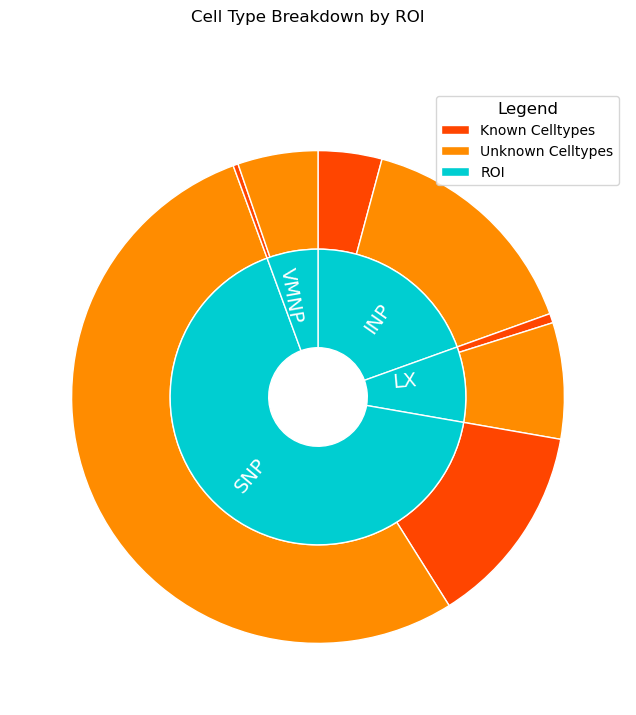

In [13]:
# Filter out the roi that have less than 100 synapses
inner_layer = inner_layer[inner_layer['weight'] >= 10]
outer_layer = outer_layer[outer_layer['weight'] >= 10]

# create a double layered pie plot with the roi as the inner layer and the celltypes as the outer layer
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the outer layer of the pie plot
wedges1, _ = ax.pie(outer_layer['weight'],  colors=outer_layer['color'],radius=1, rotatelabels=True,  startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'))

# Plot the inner layer of the pie plot
wedges2, _ = ax.pie(inner_layer['weight'], labels=inner_layer['super_roi'], colors= inner_layer['color'],labeldistance=0.5, rotatelabels= True, radius=1-0.4, startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'), textprops={'fontsize': 14, 'color': 'white'})
    
# legend with orangered, darkorange, darkturquoise corresponding to known celltypes, unknown celltypes, and roi respectively
legend_elements = [mpl.patches.Patch(facecolor='orangered', edgecolor='white', label='Known Celltypes'), mpl.patches.Patch(facecolor='darkorange', edgecolor='white', label='Unknown Celltypes'), mpl.patches.Patch(facecolor='darkturquoise', edgecolor='white', label='ROI')]
ax.legend(handles=legend_elements, loc='upper right', title='Legend', title_fontsize='large', fontsize='medium')

fig.suptitle("Cell Type Breakdown by ROI")


In [ ]:
fig.savefig('manuscript_figs/Figure3B.svg', format='svg')

In [ ]:
fig.savefig('manuscript_figs/Figure3B.pdf', format='pdf')

### Notes
I notice that these are not sorted and it think it would be visually helpful to see that..  might alight with the known types